In [35]:
#import pandas
import pandas as pd

#import matplot
import matplotlib.pyplot as plt

In [36]:
#panda display settings
pd.set_option('display.notebook_repr_html', True) #shows panda dataframes as HTML tables
pd.set_option('display.precision', 2) #sets precision to 2 decimal places
pd.set_option('display.float_format', '{:.2f}'.format) #sets floating point number format to 2 decimal places with python string formatting

In [37]:
#imports the specific sheet of the file and skips needed rows
mg = pd.read_excel('SIPRI-Milex-data-1948-2023.xlsx', sheet_name = 'Share of GDP', skiprows = 5) #Military Spending as Percent of GDP
mpc = pd.read_excel('SIPRI-Milex-data-1948-2023.xlsx', sheet_name ='Per capita', skiprows = 6) #Military Spending Per Capita
ms = pd.read_excel('SIPRI-Milex-data-1948-2023.xlsx', sheet_name ='Constant (2022) US$', skiprows = 5) #Military Spending

In [38]:
#Makes necessary columns numeric
ms.iloc[:,1:] = ms.iloc[:,1:].apply(pd.to_numeric, errors = 'coerce') 

#Data organized by country and summed up 
military_total = ms.groupby('Country').sum() 

#Finds total for 2015 through 2020 for countries and makes it numeric
military_total['Total'] = pd.to_numeric(military_total.loc[:, 2015:2020].sum(axis=1), errors = 'coerce')

#Finds Top 11 Countries for those years
top_countries = military_total.nlargest(11, 'Total')['Total']

#Prints those countries
print(top_countries)

Country
United States of America   4851223.21
China                      1444984.92
Russia                      480914.00
Saudi Arabia                462462.61
India                       417599.08
United Kingdom              356466.82
France                      302317.64
Germany                     282441.31
Japan                       248160.18
Korea, South                240034.38
Australia                   170619.15
Name: Total, dtype: float64


In [39]:
#creates list of our top countries (Saudi Arabia is not being used because it has no data)
top_countries = ['United States of America', 'China', 'Russia', 'India', 'Australia', 'United Kingdom', 'France', 'Germany', 'Japan', 'Korea, South']

In [40]:
#filter rows to show only countries in our list
military_spending = ms[ms['Country'].isin(top_countries)]

#filter columns to show only our specified years
military_spending = military_spending[['Country'] + list(range(2015, 2021))]

#Shows Table
military_spending

,Country,2015,2016,2017,2018,2019,2020
72,United States of America,782616.27,780214.76,772175.86,795416.28,840614.81,880185.24
87,Australia,26247.04,28741.68,28690.28,28005.26,28764.49,30170.39
94,India,58606.93,64584.08,69133.65,71568.22,76620.73,77085.47
99,China,208818.91,220839.65,234421.63,248153.16,260242.52,272509.05
100,Japan,40397.42,40157.38,39891.73,41899.83,43091.61,42722.21
102,"Korea, South",36376.48,37287.93,37973.84,39899.71,43113.96,45382.46
151,Russia,86743.29,92992.48,75353.78,72514.63,75764.91,77544.91
160,France,48490.26,50370.31,51033.03,49774.04,50596.38,52053.62
161,Germany,42038.61,43862.89,45120.98,46366.15,50860.82,54191.85
174,United Kingdom,58316.72,58113.41,58219.58,58657.77,61094.45,62064.89


In [41]:
#function
def plot_ms_line(military):
    
    #extracting unique country names from Country column
    countries = military['Country'].unique()

    #plotting the military spending for each country
    plt.figure(figsize=(9,6)) #set a larger figure
    for country in countries:
        years = [2015, 2016, 2017, 2018, 2019, 2020]
        plt.plot(years, military.loc[military['Country'] == country, years].values.flatten()/1e3, label=country)

    #title and labels
    plt.title('Money Spent on Military (2015-2020)', fontsize=16, fontweight='bold')
    plt.xlabel('Year', fontsize=14)
    plt.ylabel('Military Spending (US $B)', fontsize=14)

    #legend
    plt.legend(title='Country', loc='upper left', fontsize=10, bbox_to_anchor=(1.02, 1), ncol=1)

    #x-axis labels and font
    plt.xticks(years, fontsize=12)

    #y-axis font
    plt.yticks(fontsize=12)

    #removes space
    plt.margins(x=0)

    #save the chart as a PNG file with high resolution (300 DPI)
    plt.savefig('militaryspending_line.png', dpi = 300, bbox_inches='tight', pad_inches=0.2) #increase the padding
    plt.show()

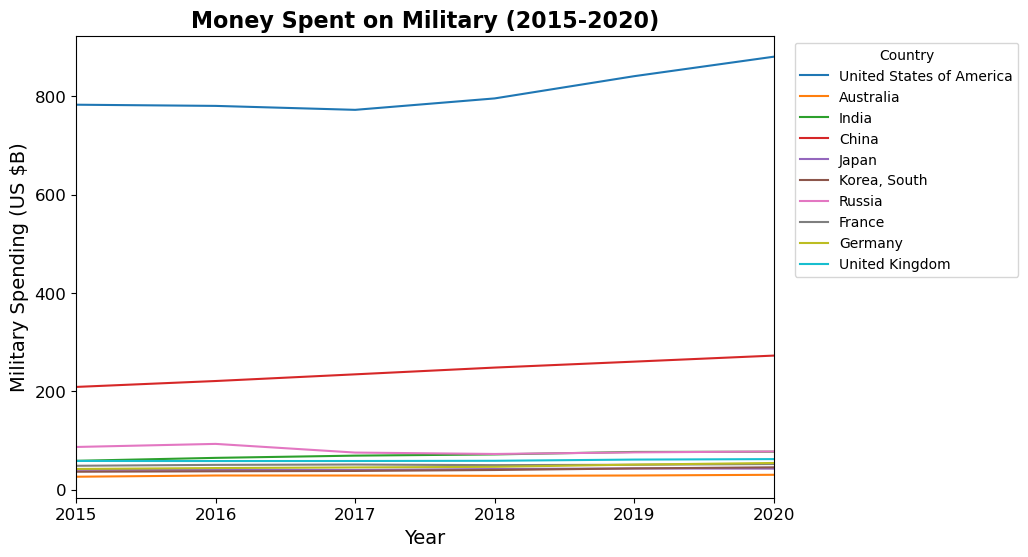

In [42]:
 plot_ms_line(military_spending)